In [1]:

import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

import sklearn

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Dense, Dropout,Flatten,Conv2D, MaxPooling2D
import sys
from sklearn.preprocessing import StandardScaler
from sdv.demo import load_tabular_demo
from sdv.tabular import CTGAN
from sdv.evaluation import evaluate
np.set_printoptions(threshold=sys.maxsize)

In [2]:
pwd

'C:\\Users\\zheng\\Desktop\\MUSA 650 RS\\429\\musa650-final\\script'

In [3]:
data_raw= pd.read_csv('..\\rawdata\\landslide3.csv')
data_raw.head()

,SLIDE_TYPE,M_WIDTH,S_LENGTH,SLOPE,COVER,YEAR_1,HEADELEV,TAILELEV,ELE_DIFF,GULLY,CLASS,curv_plan,curv_prof,aspect,curv,ID
0,R,14.0,8.0,9999.0,C,1967,9999.0,9999.0,9999.0,N,S,-9999.0,-9999.0,-9999.000,-9999.0,0
1,R,13.0,6.0,9999.0,C,1967,9999.0,9999.0,9999.0,N,S,-9999.0,-9999.0,-9999.000,-9999.0,1
2,R,15.0,13.5,9999.0,C,1967,9999.0,9999.0,9999.0,N,S,-9999.0,-9999.0,295.115,-9999.0,2
3,R,18.0,10.0,9999.0,C,1967,9999.0,9999.0,9999.0,N,S,-9999.0,-9999.0,150.945,-9999.0,3
4,R,17.0,10.0,9999.0,C,1967,9999.0,9999.0,9999.0,N,S,-9999.0,-9999.0,133.977,-9999.0,4


#### data process


D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CLASS', ylabel='count'>

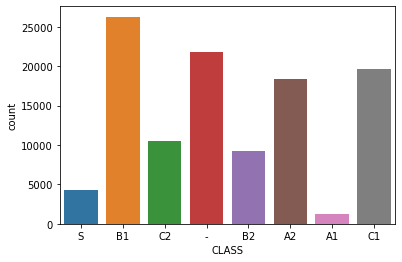

In [4]:
#lot of '-' meaning uncategorized landslide
sns.countplot(data_raw['CLASS'] )

In [5]:
#todo: nothing to change here, we select 10000 data randomly
data=data_raw.sample(n=10000)

In [6]:
data.shape

(10000, 16)

C:\Users\zheng\AppData\Local\Temp/ipykernel_20792/1970437344.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['history']=2022-data1['YEAR_1']
D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SLIDE_TYPE', ylabel='count'>

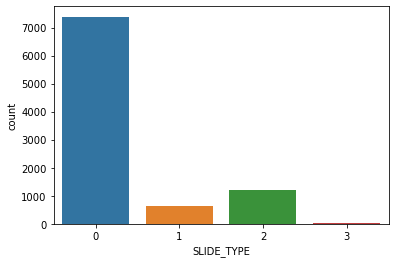

In [7]:
data1=data[~data['SLOPE'].isin([9999])]
data1=data[~data['HEADELEV'].isin([9999])]
data1=data[~data['TAILELEV'].isin([9999])]

#newly added data: curv_plan, curv_prof, aspect, curv
data1=data[~data['curv_plan'].isin([-9999])]
data1=data[~data['curv_prof'].isin([-9999])]
data1=data[~data['aspect'].isin([-9999])]
data1=data[~data['curv'].isin([-9999])]

data1['history']=2022-data1['YEAR_1']
data1=data1.drop(['YEAR_1','CLASS','ID'], axis=1)
#remove class
data2 = pd.get_dummies(data1, columns=['COVER','GULLY'])
#Y variable: SLIDE_TYPE
def slide_type(slide_type1):
    if slide_type1 == 'R':
        return 0
    elif slide_type1 == 'C':
        return 1
    elif slide_type1 == 'O':
        return 2
    else :
        return 3
    
data2['SLIDE_TYPE'] = data2['SLIDE_TYPE'].apply(slide_type)

sns.countplot(data2['SLIDE_TYPE'] )

In [8]:
data2.shape

(9228, 18)

In [9]:
data2.head()

,SLIDE_TYPE,M_WIDTH,S_LENGTH,SLOPE,HEADELEV,TAILELEV,ELE_DIFF,curv_plan,curv_prof,aspect,curv,history,COVER_A,COVER_B,COVER_C,COVER_D,GULLY_N,GULLY_Y
87790,0,13.0,6.5,38.5,222.0,216.0,6.0,0.073503,-0.528514,242.8860,0.602017,59,0,0,1,0,1,0
77112,0,7.0,6.5,47.5,424.0,417.0,7.0,0.128651,-0.325933,133.0910,0.454584,59,0,0,1,0,1,0
27785,0,12.0,8.5,39.0,57.0,51.0,6.0,-0.331165,0.283138,99.4623,-0.614303,59,0,0,1,0,1,0
85899,0,10.5,13.5,40.5,277.0,268.0,9.0,0.051353,-0.145224,341.5650,0.196577,59,0,0,1,0,1,0
16880,0,9.0,5.0,29.5,117.0,112.0,5.0,0.088577,0.137721,200.7070,-0.049144,59,0,0,1,0,1,0


In [10]:
col= data2.columns[pd.np.r_[1:18]]
x = np.array(data2[col])
y=np.array(data2['SLIDE_TYPE'])
# collect data with train data:test data is 3:7
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, stratify = y, random_state = 4)


C:\Users\zheng\AppData\Local\Temp/ipykernel_20792/3010493044.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  col= data2.columns[pd.np.r_[1:18]]


In [11]:
print(y.shape)
print(x.shape)
print(X_train.shape)
print(y_train.shape)

(9228,)
(9228, 17)
(6459, 17)
(6459,)


In [12]:
y_train[:5]

array([1, 0, 0, 0, 1], dtype=int64)

In [13]:
X_train[:5,:]

array([[ 1.20000e+01,  1.15000e+01,  4.50000e+01,  2.26000e+02,
         1.40000e+01,  2.12000e+02,  5.25918e-02, -1.07127e-01,
         3.04019e+02,  1.59719e-01,  1.40000e+01,  1.00000e+00,
         0.00000e+00,  0.00000e+00,  0.00000e+00,  1.00000e+00,
         0.00000e+00],
       [ 1.30000e+01,  7.50000e+00,  2.85000e+01,  2.39000e+02,
         2.35000e+02,  4.00000e+00,  4.37082e-01,  7.06979e-03,
        -9.99900e+03,  4.30012e-01,  5.90000e+01,  0.00000e+00,
         0.00000e+00,  1.00000e+00,  0.00000e+00,  1.00000e+00,
         0.00000e+00],
       [ 1.20000e+01,  9.00000e+00,  5.20000e+01,  4.58000e+02,
         4.48000e+02,  1.00000e+01, -1.11331e-01,  5.52116e-01,
         1.65084e+02, -6.63447e-01,  5.90000e+01,  0.00000e+00,
         0.00000e+00,  1.00000e+00,  0.00000e+00,  1.00000e+00,
         0.00000e+00],
       [ 1.10000e+01,  9.00000e+00,  2.95000e+01,  2.32000e+02,
         2.26000e+02,  6.00000e+00, -9.22204e-02, -1.85040e-02,
         1.18880e+02, -7.37164e-02,

### changes of data processing

In [14]:
# the input of gan in svd package is df, here convert the numpy into df
original_train=np.concatenate((y_train.reshape(-1,1),X_train),axis=1)
train_data=pd.DataFrame(data=original_train,columns=data2.columns[pd.np.r_[:18]])
train_data.head()


C:\Users\zheng\AppData\Local\Temp/ipykernel_20792/2506634044.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  train_data=pd.DataFrame(data=original_train,columns=data2.columns[pd.np.r_[:18]])


,SLIDE_TYPE,M_WIDTH,S_LENGTH,SLOPE,HEADELEV,TAILELEV,ELE_DIFF,curv_plan,curv_prof,aspect,curv,history,COVER_A,COVER_B,COVER_C,COVER_D,GULLY_N,GULLY_Y
0,1.0,12.0,11.5,45.0,226.0,14.0,212.0,0.052592,-0.107127,304.0190,0.159719,14.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,13.0,7.5,28.5,239.0,235.0,4.0,0.437082,0.007070,-9999.0000,0.430012,59.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,12.0,9.0,52.0,458.0,448.0,10.0,-0.111331,0.552116,165.0840,-0.663447,59.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,11.0,9.0,29.5,232.0,226.0,6.0,-0.092220,-0.018504,118.8800,-0.073716,59.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.0,8.0,10.5,46.0,173.0,70.0,103.0,0.116783,0.055352,82.2348,0.061430,4.0,1.0,0.0,0.0,0.0,0.0,1.0


# code below: train each label respectively

### GAN Core

In [36]:
# todo(important!): if you have GPU, cuda = True, else cuda = False 
model = CTGAN(cuda=True)

# todo(important!): here we train gan model according to original train_data
# tune the parameter according to ref doc: https://sdv.dev/SDV/user_guides/single_table/ctgan.html
model.fit(train_data)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  label = cluster.KMeans(n_clusters=self.n_components, n_init=1,
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check f

In [37]:
original_train.shape

(6453, 18)

In [38]:

# todo: nothing needs to change but a reminder: 
# once you decide to use previous model, just load it, you don't need to train it again!

# save gan model 
model.save('new_trial\\my_model.pkl')


In [15]:
# load gan model 
loaded = CTGAN.load('new_trial\\my_model.pkl')

In [16]:
# generate new data, the original data: new data = 1:1 
# todo: you can change the ratio between original data: new data by 'num_rows'
new_data = loaded.sample(num_rows=train_data.shape[0])

In [17]:
new_data.shape

(6459, 18)

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SLIDE_TYPE', ylabel='count'>

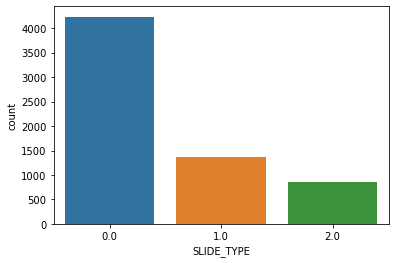

In [18]:
# label ditribution in sythetic data
# filter 
# todo(important!): nothing need to change, but remember to tune the parameter according to the this plot
sns.countplot(new_data['SLIDE_TYPE'] )


In [61]:
# todo(important!): understand the evaluation metric and add it to report 
# and use other metrics with doc below to evaluate and figure out what is wrong with new data
# ref doc: https://sdv.dev/SDV/user_guides/evaluation/index.html#evaluation
evaluate(new_data, train_data)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.5731210564151478

In [19]:
# new train data: the mixture of original and generative data
new_train=pd.concat(
    [new_data, train_data],
    axis=0,
)
print(new_train.shape)
new_train.head()

(12918, 18)


,SLIDE_TYPE,M_WIDTH,S_LENGTH,SLOPE,HEADELEV,TAILELEV,ELE_DIFF,curv_plan,curv_prof,aspect,curv,history,COVER_A,COVER_B,COVER_C,COVER_D,GULLY_N,GULLY_Y
0,0.0,10.7,7.6,13.614113,9866.435421,62.518139,17.654915,-0.048019,0.129014,280.122101,0.258717,59.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,10.8,4.5,36.384715,265.360988,244.381519,2.000000,0.060665,0.228032,168.307889,-0.095256,59.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,16.1,32.5,10.231371,308.879090,348.223285,2.000000,-0.173069,0.004044,254.904575,-0.414647,59.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,25.3,8.5,36.321041,900.015639,170.339736,21.650686,0.042261,0.239702,286.717396,0.795274,59.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,7.8,3.8,30.130457,173.738161,117.005156,11.470542,-0.045820,-0.000117,185.618447,-0.030861,59.0,0.0,0.0,1.0,0.0,0.0,1.0


In [20]:
# todo: nothing needs to change, but you can read the data directly next time
new_train.to_csv('../save_data/new_train1.csv')

In [21]:
#shuffle data
new_train_data = new_train.sample(frac=1).reset_index(drop=True)


In [22]:
# convert df to numpy for training input 
new_train_X=new_train_data.iloc[:,1:].values
new_train_Y_1=new_train_data.iloc[:,0:1].values
new_train_Y=np.squeeze(new_train_Y_1)

In [23]:
print(new_train_X.shape)
print(X_test.shape)
print(new_train_Y.shape)
print(y_test.shape)

(12918, 17)
(2769, 17)
(12918,)
(2769,)


In [24]:
# We need to do feature scaling first.
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler
sc = StandardScaler()
#sc = MinMaxScaler()
new_train = sc.fit_transform(new_train_X)
X_test = sc.fit_transform(X_test)

### 1. KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# todo: n_jobs=-1, accelerate running speed: https://scikit-learn.org/stable/computing/parallelism.html
model = KNeighborsClassifier(n_jobs=-1)

param_grid = { 
    'n_neighbors': [3,5,11,19],
    'weights': ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan'],
}

grid = GridSearchCV(estimator=model, param_grid=param_grid,n_jobs=-1)

grid.fit(new_train_X, new_train_Y.ravel())

metric = grid.best_estimator_.metric
n_neighbors = grid.best_estimator_.n_neighbors
weights = grid.best_estimator_.weights

# summarize the results of the grid search
print('Best score:', grid.best_score_)
print('Best hyperparameters:',grid.best_params_)

Best score: 0.8080201999498987
Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


In [26]:
knn = KNeighborsClassifier(metric=metric, n_neighbors=n_neighbors, weights=weights, n_jobs=8).fit(new_train_X, new_train_Y.ravel())
knn_pred = knn.predict(X_test)
knn_proba = knn.predict_proba(X_test)

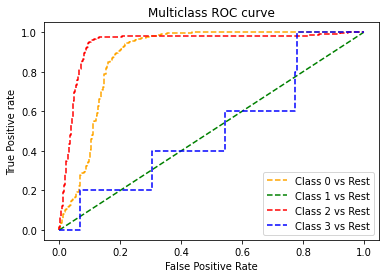

In [27]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, knn_proba[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='red', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='blue', label='Class 3 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300);

In [28]:
knn_cls_precision, knn_cls_recall, knn_cls_f1, _ = precision_recall_fscore_support(y_test, knn_pred, average=None, labels=[0,1,2,3])

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
knn_conf_mat = confusion_matrix(y_test, knn_pred)
knn_acc = accuracy_score(y_test, knn_pred)
print('k Nearest Neighbors:')
print('Accuracy:',knn_acc)
#print('ROC AUC=%.4f' % (knn_roc_auc))

k Nearest Neighbors:
Accuracy: 0.7999277717587576


Confusion Matrix:


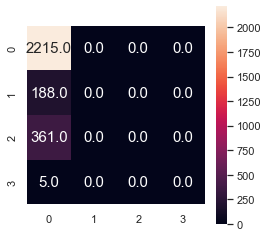

In [30]:
array = confusion_matrix(y_test, knn_pred)

knn_cm = pd.DataFrame(array, range(4), range(4))

plt.figure(figsize=(4,4))
sns.set(font_scale=1) # for label size
sns.heatmap(knn_cm, annot=True, annot_kws={"size": 15}, cbar=True, square= True, fmt='.1f') # font size

print('Confusion Matrix:')
plt.show()

In [31]:
for i in range(n_class): 
    print(i)
    print('Precision  = %.4f ' % (knn_cls_precision[i]))
    print('Recall on Y label = %.4f ' % (knn_cls_recall[i]))
    print('F1 on Y label = %.4f ' % (knn_cls_f1[i]))
    print('----------------------------')

0
Precision  = 0.7999 
Recall on Y label = 1.0000 
F1 on Y label = 0.8888 
----------------------------
1
Precision  = 0.0000 
Recall on Y label = 0.0000 
F1 on Y label = 0.0000 
----------------------------
2
Precision  = 0.0000 
Recall on Y label = 0.0000 
F1 on Y label = 0.0000 
----------------------------
3
Precision  = 0.0000 
Recall on Y label = 0.0000 
F1 on Y label = 0.0000 
----------------------------


## 2. Logistic Regression

In [32]:
model = LogisticRegression(random_state=0, solver = 'liblinear')

param_grid={'C':np.logspace(-3,3,7), # inverse of regularization strength
     }

grid = GridSearchCV(estimator=model, param_grid=param_grid)

grid.fit(new_train_X, new_train_Y.ravel())

C = grid.best_estimator_.C

# summarize the results of the grid search
print('Best score:', grid.best_score_)
print('Best hyperparameters:',grid.best_params_)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

Best score: 0.848042212177982
Best hyperparameters: {'C': 1.0}


In [33]:
lr = LogisticRegression(random_state =0, solver = 'liblinear', C=C).fit(new_train_X, new_train_Y.ravel())

In [34]:
lr_pred = lr.predict(X_test)
lr_proba = lr.predict_proba(X_test)

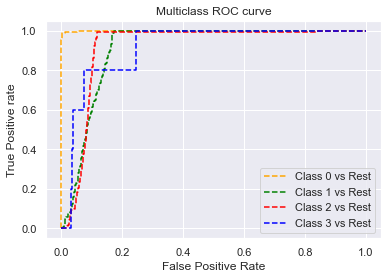

In [35]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, lr_proba[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='red', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='blue', label='Class 3 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300);

In [36]:
lr_cls_precision, lr_cls_recall, lr_cls_f1, _ = precision_recall_fscore_support(y_test, lr_pred, average=None, labels=[0,1,2,3])

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
lr_conf_mat = confusion_matrix(y_test, lr_pred)
lr_acc = accuracy_score(y_test, lr_pred)
print('Logistic regression:')
print('Accuracy:',lr_acc)
#print('ROC AUC=%.4f' % (knn_roc_auc))

Logistic regression:
Accuracy: 0.8916576381365113


Confusion Matrix:


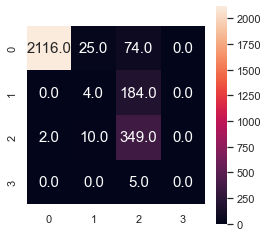

In [39]:
array = confusion_matrix(y_test, lr_pred)

lr_cm = pd.DataFrame(array, range(4), range(4))

plt.figure(figsize=(4,4))
sns.set(font_scale=1) # for label size
sns.heatmap(lr_cm, annot=True, annot_kws={"size": 15}, cbar=True, square= True, fmt='.1f') # font size

print('Confusion Matrix:')
plt.show()